<a href="https://colab.research.google.com/github/bkp5190/2DPlatformer/blob/main/ImageRecoginiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Tensorflow import and version check
# pip install tensorflow
import tensorflow as tf
print(f"Tensorflow Version {tf.__version__}")

Tensorflow Version 2.12.0


In [16]:
# Keras import and numpy/matplotlib
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Install kaggle for dataset
# pip install kaggle

In [18]:
# Upload kaggle.json with API key

# from google.colab import files
# files.upload()
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle dataset

# !kaggle datasets download -d kmader/food41
# !unzip food41.zip

<dtype: 'uint8'>


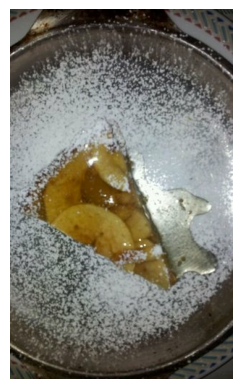

In [19]:
# Read the image file
img = tf.io.read_file('images/apple_pie/1005649.jpg')

# Decode the image
img = tf.image.decode_jpeg(img, channels=3)

# Print the data type of the image
print(img.dtype)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

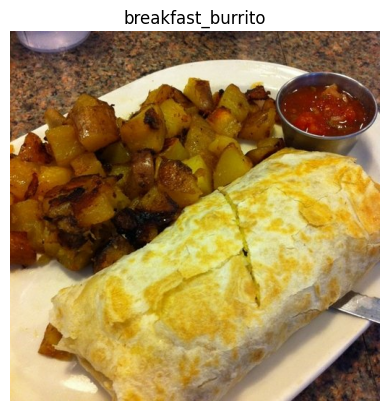

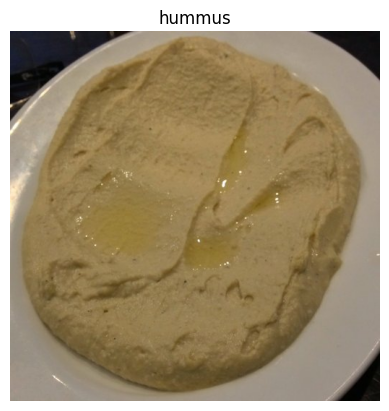

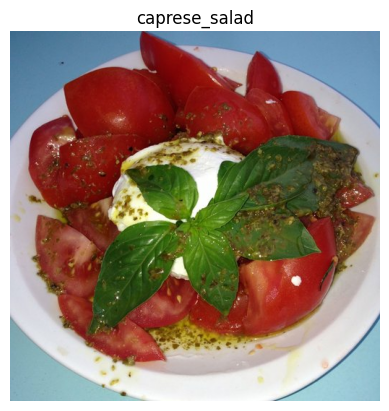

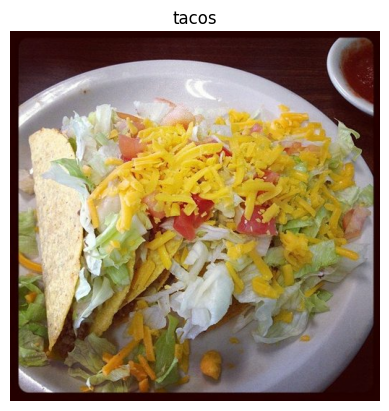

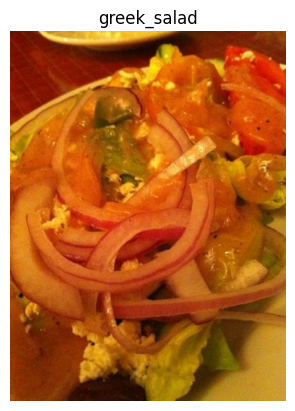

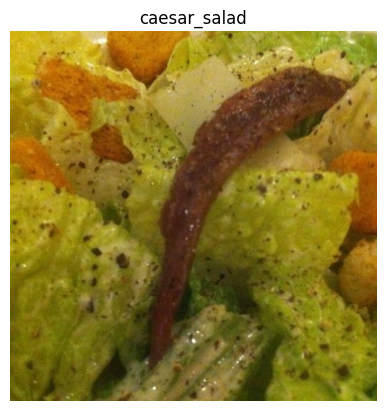

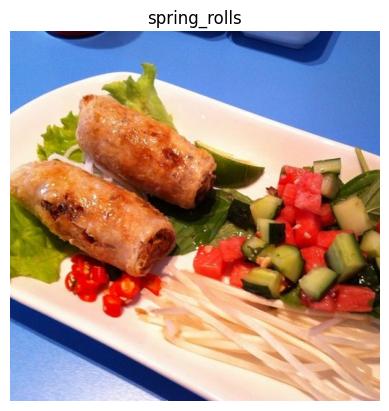

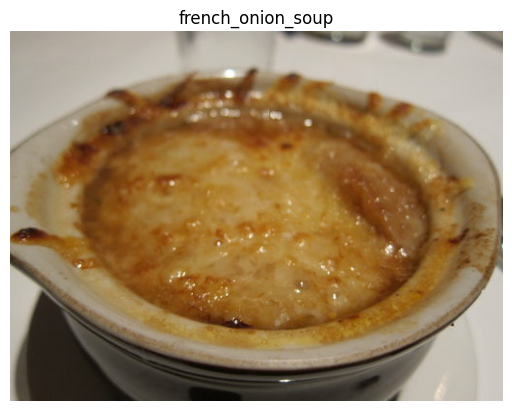

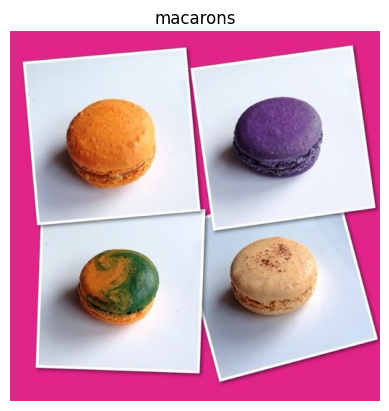

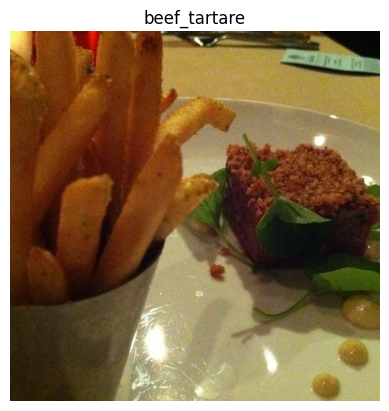

In [20]:
import os

# Define the root directory where the images are located
root_dir = 'images/'

# Get a list of subdirectories (food types)
food_types = os.listdir(root_dir)

# Iterate over the first 10 subdirectories
for food_type in food_types[:10]:
    # Get the list of image files in the current subdirectory
    images_dir = os.path.join(root_dir, food_type)
    image_files = os.listdir(images_dir)

    # Get the path to the first image in the subdirectory
    first_image_path = os.path.join(images_dir, image_files[0])

    # Read and decode the image
    img = tf.io.read_file(first_image_path)
    img = tf.image.decode_jpeg(img, channels=3)

    # Display the image
    plt.imshow(img)
    plt.title(food_type)
    plt.axis('off')
    plt.show()

In [21]:
# Prepare the Dataset
# Need to iterate over all of the data and label

In [22]:
from sklearn.model_selection import train_test_split

# Read the train.txt and test.txt files
with open('meta/meta/train.txt', 'r') as f:
    train_paths = [line.strip() + '.jpg' for line in f.readlines()]

with open('meta/meta/test.txt', 'r') as f:
    test_paths = [line.strip() + '.jpg' for line in f.readlines()]

# Print the number of training and testing samples
print('Number of training samples:', len(train_paths))
print('Number of testing samples:', len(test_paths))
print('Total', len(train_paths) + len(test_paths))


Number of training samples: 75750
Number of testing samples: 25250
Total 101000


In [23]:
# Validate image paths
image_dir = 'images/'
train_file_paths = [image_dir + path for path in train_paths]
test_file_paths = [image_dir + path for path in test_paths]
print(train_file_paths)
print(test_file_paths)

from PIL import Image

for file_path in train_file_paths:
    try:
        Image.open(file_path)
    except Exception as e:
        print(f"Error opening image file: {file_path}")
        print(e)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



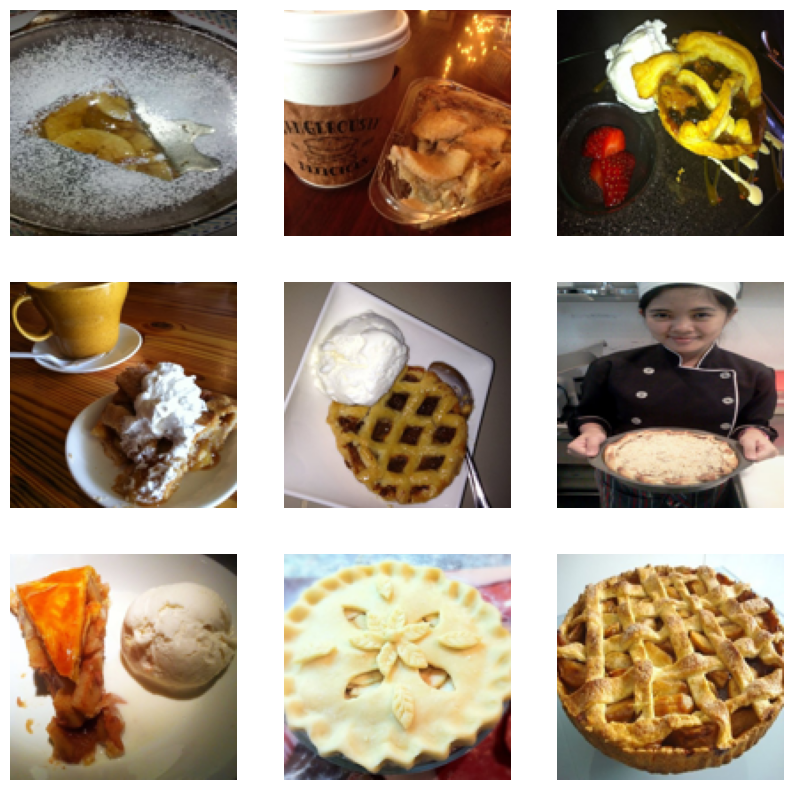

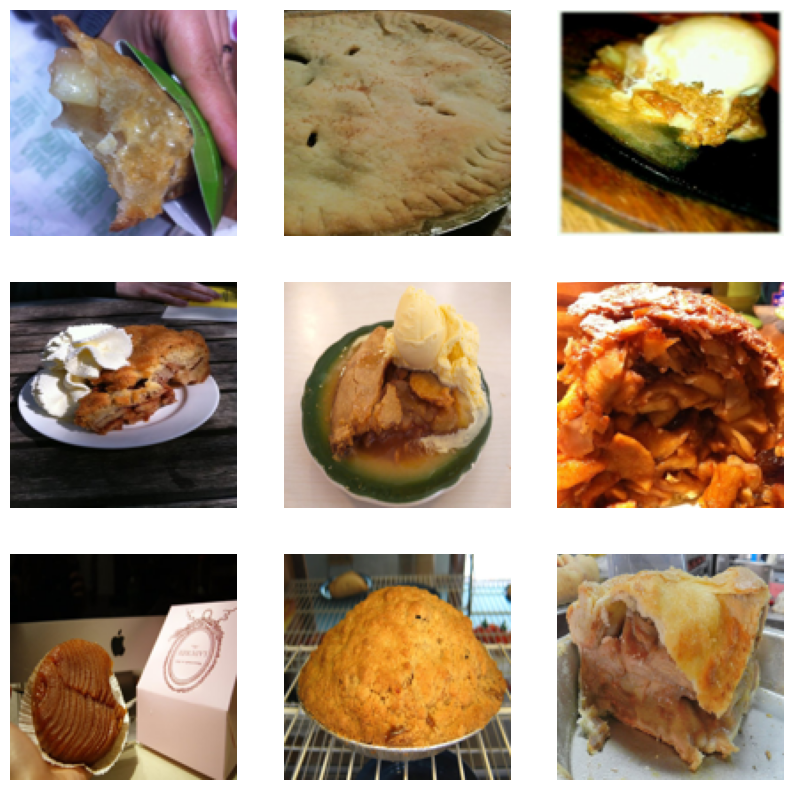

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

# Example code for visualizing resized images
image_dir = 'images/'

# Resizing and plotting example for train images
train_images = [Image.open(image_dir + path).resize((128, 128)) for path in train_paths[:10]]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

# Resizing and plotting example for test images
test_images = [Image.open(image_dir + path).resize((128, 128)) for path in test_paths[:10]]
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_images[i])
    plt.axis('off')
plt.show()


In [63]:
import tensorflow as tf

# Define the directory containing the images
directory = 'images/'

# Create a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)


# Create a validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)


Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [65]:
# Preprocess the data
import tensorflow as tf

# Preprocess the training dataset
train_dataset = train_dataset.map(lambda x, y: (x / 255, y))

# Preprocess the validation dataset
validation_dataset = validation_dataset.map(lambda x, y: (x / 255, y))


(32, 256, 256, 3)


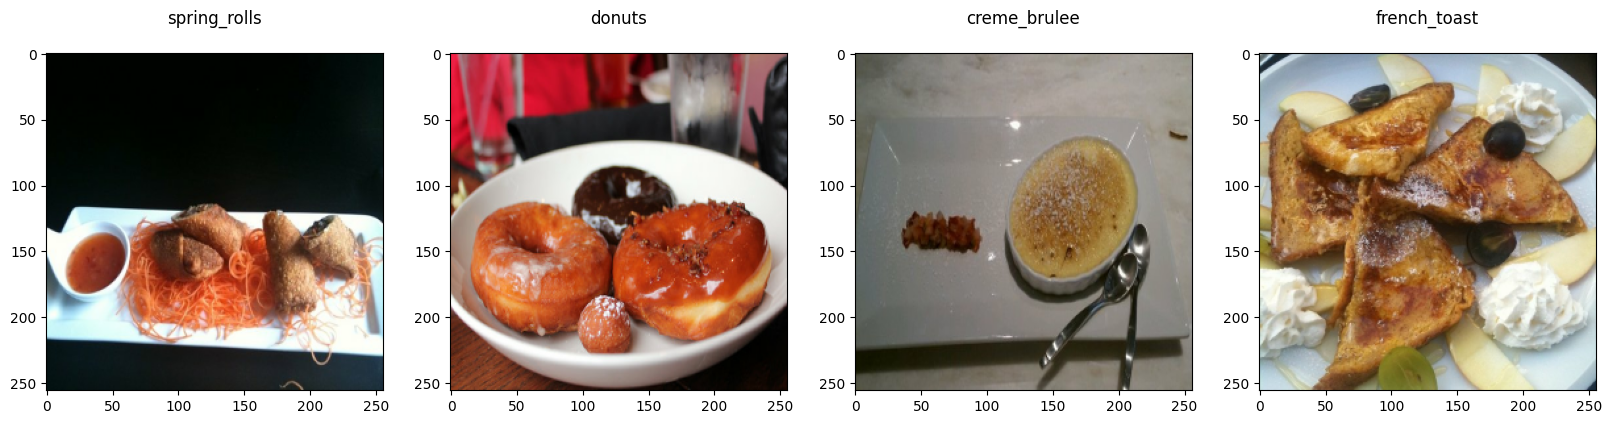

In [67]:
import numpy as np
train_iterator = train_dataset.as_numpy_iterator()
validation_iterator = validation_dataset.as_numpy_iterator()
batch = train_iterator.next()
print(batch[0].shape)
with open('meta/meta/classes.txt') as file:
  labels = {index:name for index, name in enumerate(file.readlines())}
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  index = np.argmax(batch[1][idx])
  ax[idx].title.set_text(labels[index])

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

# Define the model architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
hist = model.fit(train_dataset, epochs=4,
                 validation_data=validation_dataset,
                 callbacks=[tensorboard_callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

KeyboardInterrupt: ignored